
##### Syed Ali Alim Rizvi

### Libraries

In [1]:
library(reshape2)
library(ggplot2)

Warning message:
"package 'reshape2' was built under R version 3.5.1"Warning message:
"package 'ggplot2' was built under R version 3.5.1"

### KNN Regressor

#### Developing KNN Regressor

In [2]:
# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= 'euclidean'))[1:test.len, (test.len+1):(test.len+train.len)]
       
    #create storage for regression predictions
    test.label <- rep(0,test.len)
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate the predicted labels according to the majority vote
        test.label[i]<- (mean(train.label[nn]))
    }
    
    ## return the class labels as output
    return (test.label)
}

#### Plot training and testing errors

In [3]:
t1a.train <- read.csv('KNN_train.csv')
t1a.test <- read.csv('KNN_test.csv')

In [4]:
train.data <- t1a.train[,1, drop=0]
train.label <- t1a.train[,2]
test.data <- t1a.test[,1, drop=0]
test.label <- t1a.test[,2]

In [5]:
# calculate the train and test missclassification rates for K in 1:100 
# THIS MAY TAKE A FEW MINUTES TO COMPLETE!
miss <- data.frame('K'=1:20, 'train'=rep(0,20), 'test'=rep(0,20))
for (k in 1:20){
    
    miss[k,'train'] <- sum((train.label - knn(train.data, train.label, train.data, K=k))^2)
    miss[k,'test'] <- sum((test.label - knn(train.data, train.label, test.data, K=k))^2)
    
}

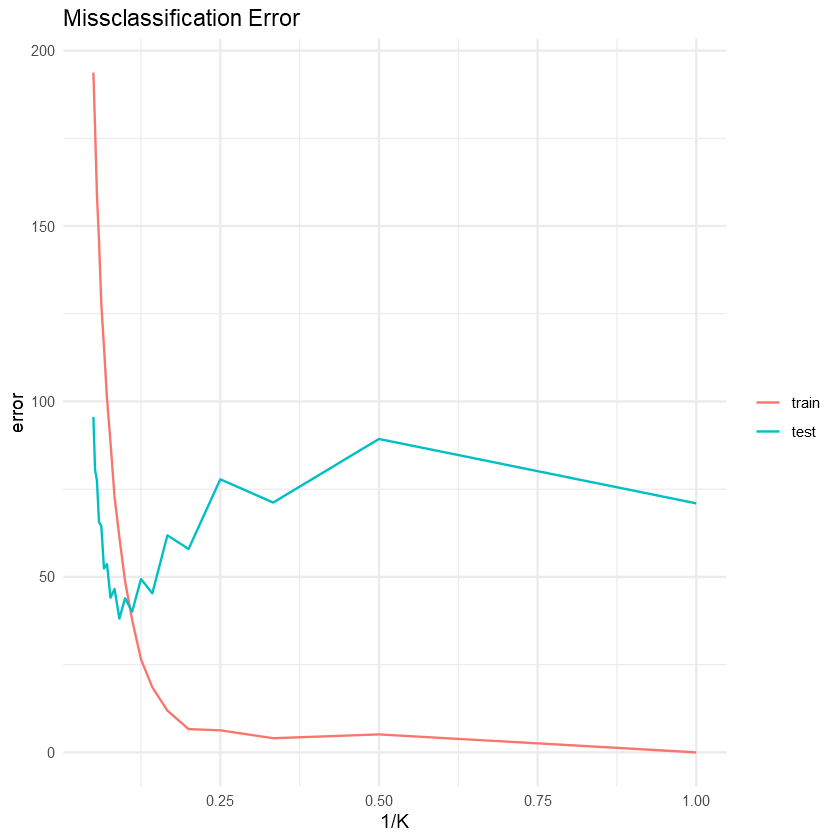

In [6]:
# plot misclassification percentage for train and test data sets
miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'error')
ggplot(data=miss.m, aes(x=1/K, y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Missclassification Error")

### The Error function used is the Sum of Squared Errors (SSE)

$$SSE = \sum_{i=1}^{n}(y_i-f(x_i))^2$$



#### optimum value of K

In [7]:
#get index at which the test error was lowest
which.min(miss[,3])

[1] 11

The optimum value of K seems to be `K=11`. 